In [3]:
# spam_classifier_project/
# │
# ├── spam.csv              # Dataset (you can get it from Kaggle)
# ├── train_model.py        # This file contains all training + saving code
# ├── app.py                # For predictions or app integration
# └── requirements.txt      # Package dependencies

In [4]:
# ============================================
# 0. IMPORTING LIBRARIES
# ============================================

# Pandas and NumPy for data handling
import pandas as pd
import numpy as np

# Text processing libraries
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Machine Learning tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For saving the model
import pickle

# Download NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Prateek
[nltk_data]     Dubey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Prateek
[nltk_data]     Dubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# ============================================
# 1. LOAD DATASET
# ============================================

# Load dataset (available on Kaggle: 'spam.csv')
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Select only required columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']  # Rename for clarity

# Map labels: 'ham' → 0, 'spam' → 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Drop duplicate messages (if any)
df = df.drop_duplicates()

In [6]:
# ============================================
# 2. TEXT CLEANING FUNCTION
# ============================================

# Initialize a stemmer to reduce words to base/root form
ps = PorterStemmer()

# Text transformation function for cleaning
def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize words

    y = []
    for word in text:
        # Remove punctuation, stopwords, and stem words
        if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
            y.append(ps.stem(word))

    return " ".join(y)

# Apply cleaning to all messages
df['transformed_text'] = df['text'].apply(transform_text)

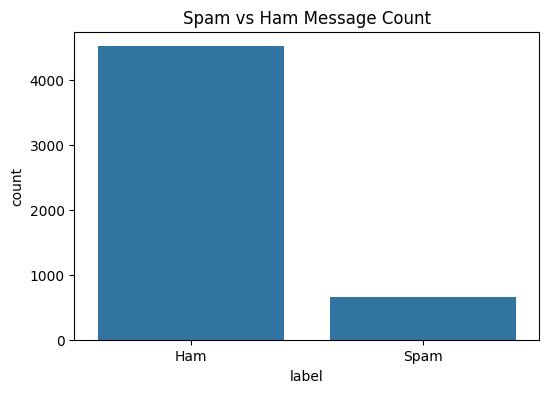

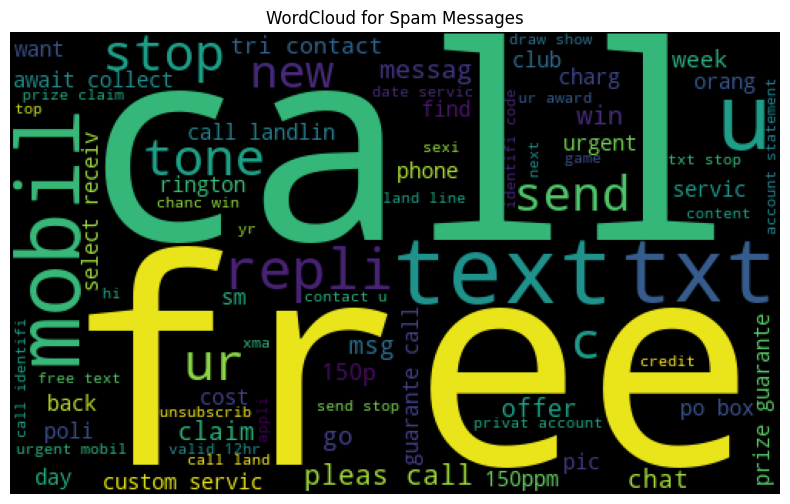

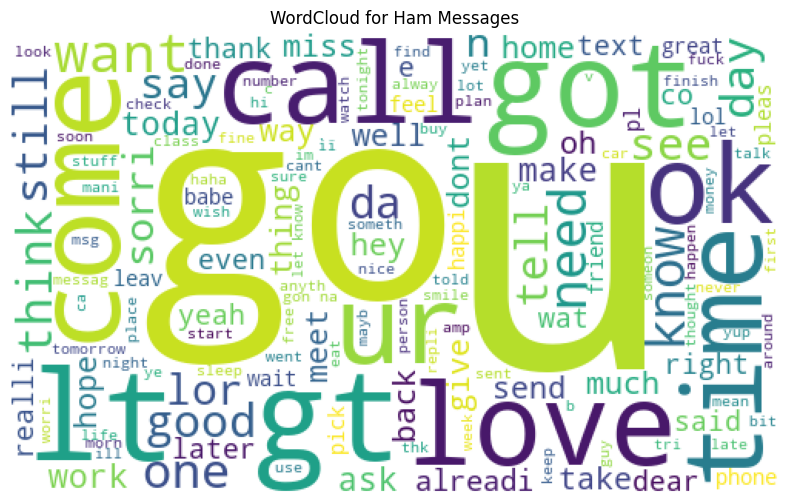

In [7]:
# ============================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Spam vs Ham count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title('Spam vs Ham Message Count')
plt.xticks([0,1], ['Ham', 'Spam'])
plt.show()

# WordCloud for Spam
spam_wc = WordCloud(width=500, height=300, min_font_size=10, background_color='black')
spam_words = df[df['label']==1]['transformed_text'].str.cat(sep=" ")
plt.figure(figsize=(10,6))
plt.imshow(spam_wc.generate(spam_words))
plt.axis("off")
plt.title('WordCloud for Spam Messages')
plt.show()

# WordCloud for Ham
ham_wc = WordCloud(width=500, height=300, min_font_size=10, background_color='white')
ham_words = df[df['label']==0]['transformed_text'].str.cat(sep=" ")
plt.figure(figsize=(10,6))
plt.imshow(ham_wc.generate(ham_words))
plt.axis("off")
plt.title('WordCloud for Ham Messages')
plt.show()

In [8]:
# ============================================
# 4. FEATURE EXTRACTION USING TF-IDF
# ============================================

# Convert text into numerical features using TF-IDF (Term Frequency - Inverse Document Frequency)
tfidf = TfidfVectorizer(max_features=3000)

# X → features; y → target
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

In [9]:
# ============================================
# 5. TRAIN-TEST SPLIT
# ============================================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# ============================================
# 6. MODEL TRAINING - MULTINOMIAL NAIVE BAYES
# ============================================

model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [11]:
# ============================================
# 7. EVALUATION ON TEST DATA
# ============================================

y_pred = model.predict(X_test)

# Accuracy and confusion matrix
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9729206963249516
🔍 Confusion Matrix:
 [[888   1]
 [ 27 118]]
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [12]:
# ============================================
# 8. SAVE THE MODEL AND VECTORIZER
# ============================================

# Save model
pickle.dump(model, open('model.pkl', 'wb'))

# Save vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

print("🎉 Model and vectorizer saved successfully.")

🎉 Model and vectorizer saved successfully.
